# t-SNE – Wine Quality (Vin rouge)

Ce notebook applique **t-SNE (t-Distributed Stochastic Neighbor Embedding)** selon le cahier des charges :
- Visualisation en 2D de la structure des données
- Observer des clusters complexes
- Suivi avec MLflow

## 1. Imports et configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
# Trouver la racine du projet (dossier contenant src/preprocessing.py)
_roots = [os.getcwd(), os.path.join(os.getcwd(), '..'), os.path.join(os.getcwd(), '..', '..')]
for _r in _roots:
    _p = os.path.join(os.path.abspath(_r), 'src', 'preprocessing.py')
    if os.path.isfile(_p):
        ROOT = os.path.abspath(_r)
        sys.path.insert(0, os.path.join(ROOT, 'src'))
        break
else:
    raise FileNotFoundError("Dossier 'src' introuvable. Ouvrez le projet ML-project (File > Open Folder) puis relancez.")
from preprocessing import load_data, clean_data, scale_features
from sklearn.manifold import TSNE
import mlflow
import mlflow.sklearn

mlflow.set_experiment("wine-quality-tsne")

2026/02/14 17:32:20 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/02/14 17:32:20 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/02/14 17:32:20 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.types
2026/02/14 17:32:20 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.constraints
2026/02/14 17:32:20 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.defaults
2026/02/14 17:32:20 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.comments
2026/02/14 17:32:21 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/02/14 17:32:21 INFO alembic.runtime.migration: Will assume non-transactional DDL.


<Experiment: artifact_location='file:///C:/Users/pc/Desktop/ML-project/reduction/mlruns/2', creation_time=1770927548536, experiment_id='2', last_update_time=1770927548536, lifecycle_stage='active', name='wine-quality-tsne', tags={}>

## 2. Chargement et preprocessing

In [2]:
df = load_data(os.path.join(ROOT, "dataset", "winequality-red.csv"))
df = clean_data(df)

X = df.drop(columns=["quality"])
y = df["quality"]

X_scaled, scaler = scale_features(X)

print(f"Dataset shape: {df.shape}")

Dataset shape: (1359, 12)


## 3. Application t-SNE

In [3]:
# t-SNE 2D
perplexity = 30
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, init="random", learning_rate="auto")
X_tsne = tsne.fit_transform(X_scaled)

print(f"t-SNE embedding shape: {X_tsne.shape}")

C:\Users\pc\anaconda3\envs\mlflow_env\lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\pc\anaconda3\envs\mlflow_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "C:\Users\pc\anaconda3\envs\mlflow_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
  File "C:\Users\pc\anaconda3\envs\mlflow_env\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\pc\anaconda3\envs\mlflow_env\lib\subprocess.py", line 971, in __init__
    sel

t-SNE embedding shape: (1359, 2)


## 4. Visualisation 2D

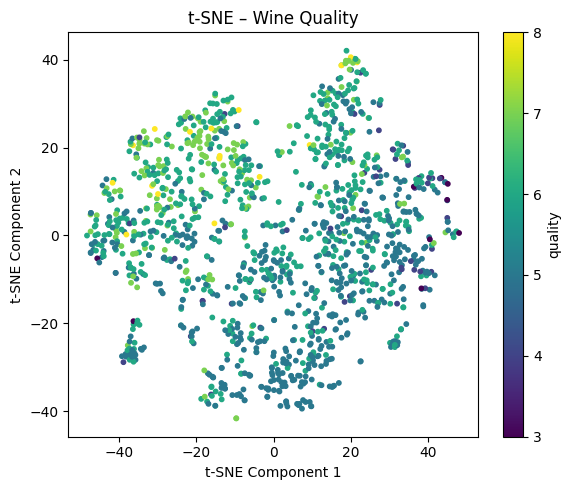

In [4]:
# Visualisation 2D colorée par quality
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="viridis", s=10)
plt.colorbar(scatter, label="quality")
plt.title("t-SNE – Wine Quality")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.tight_layout()
plt.savefig("tsne_2d.png")
plt.show()

## 5. MLflow tracking

In [5]:
with mlflow.start_run(run_name="tSNE_2d"):
    mlflow.log_param("n_components", 2)
    mlflow.log_param("perplexity", perplexity)
    mlflow.log_param("random_state", 42)
    mlflow.log_artifact("tsne_2d.png")
    mlflow.sklearn.log_model(tsne, "tsne_model")
    print("MLflow run terminé")

2026/02/14 17:32:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\pc\anaconda3\envs\mlflow_env\lib\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)
2026/02/14 17:32:34 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


MLflow run terminé
